<center><h1> Projet : le jeu des pays </h1></center>
<center><h3> Olivier BOUËT-WILLAUMEZ 21950424 </h3></center>
<center><h4> Cours de programmation, M1 MMA - IMB </h4></center>
<center><h4> Université Paris Cité, 2022-2023 </h4></center>

Import des librairies utiles pour le projet :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 

Lecture des différents fichiers et création des datas-frames :

In [2]:
#dataframe globale

world = pd.read_csv("world.csv")

#dataframe indexée par le nom des pays , qu'on utlisera dans la fonction plot_shape

world2 = pd.read_csv("world.csv",index_col="region")

#Définition de la fonction de conversion de la question 2 , qui permet de convertir les données de latitude et longitude
#en radian

def conversion(x):
    return x*np.pi/180

#On applique cette conversion à tous les éléments des deux colonnes lat et long

world['long'] = world['long'].apply(conversion)
world['lat'] = world['lat'].apply(conversion)
world2['long'] = world2['long'].apply(conversion)
world2['lat'] = world2['lat'].apply(conversion)

Fonction *rotate* : 

In [3]:
# fonction de rotation utilisant la matrice de rotation selon l'angle teta et qui nous permettra de tourner la figure

def rotate(point,angle):
    
    px,py = point
    
    qx = np.cos(angle)*px-np.sin(angle)*py
    qy = np.sin(angle)*px+np.cos(angle)*py
    
    return qx,qy

Fonction *plot_shape* qui gère l'affichage d'un pays aléatoire selon la rotation teta , qui elle aussi est aléatoire :

In [4]:
# On charge de nouvelles data frames non indéxées par la colonne région

worldentier = pd.read_csv("world.csv")
worldcities= pd.read_csv("world.cities.csv")

# World complet est un merge des deux dataframes à partir de la colonne région

worldcomplet = pd.merge(worldentier, worldcities, on='region', how='inner')

# On convertit les longitudes et latitudes des capitales en radian grâce à la fonction de conversion

worldcomplet['long.capital'] = worldcomplet['long.capital'].apply(conversion)
worldcomplet['lat.capital'] = worldcomplet['lat.capital'].apply(conversion)

# Fonction plot_shape 

def plot_shape(nom,teta):
    
    # variable qui s'assure que le pays a bien une capitale , par exemple l'antarctique n'en a pas
    
    estdedans=0
    
    for i in range(91836):
        if(worldcomplet['region'][i]==nom):
            estdedans+=1
    
    # Création d'une sous-data frame contenant seulement les lignes avec le nom du pays en question

    rows = world2.loc[nom]
 
    # Début de l'affichage
    
    # On va d'abord s'occuper de l'indice 0 du tableau , en fait on procède en regardant les différents groupes pour chaque
    # ligne du pays en question , par exemple pour la france il y'en a 3
        
    x=rows.long.loc[rows.group==rows.group[0]]
    y=rows.lat.loc[rows.group==rows.group[0]]
       
    # On applique la rotation sur la première composante du pays grâce à la fonction de rotation
    
    a,b=rotate((x,y),teta)
        
    # On affiche la partie obtenue du pays,sachant que a et b sont des vecteurs de coordonnées obtenus à partir de x,y
    # la commande fill permet le remplissage de la figure
    
    
    plt.plot(a,b,color='black')
    plt.fill(a,b,color='#8b6c48')
    
    # Boucle principale qui va afficher au fur et à mesure les parties du pays ;si le pays ne possède pas d'îles , alors 
    # on ne rentre même pas dans cette boucle
    
    for i in range(len(rows)-1):
        
        if (rows.group[i]!=rows.group[i+1]): 
            
            # on récupère les coordonées des différentes composantes du pays en parcourant groupe par groupe la dataframe
            
            x=rows.long.loc[rows.group==rows.group[i+1]]
            y=rows.lat.loc[rows.group==rows.group[i+1]]
            
            # on applique la rotation 
            
            a,b=rotate((x,y),teta)
            
            # on affiche au fur et à mesure 
            
            plt.plot(a,b,color='black')
            plt.fill(a,b,color='#8b6c48')
            
    # on affiche la grille , je trouve que ça donne un meilleur effet 
    plt.grid(color='white', linestyle=':', linewidth=0.35)
           
    # on met l'arrière plan en bleu
            
    ax = plt.gca()
    ax.set_facecolor('#00223d')
            
    # égalisation des axes pour que la figure soit relativement équlibrée à l'affichage , le pays n'est pas trop 
    # déformé de cette façon
            
    ax.axis('equal')
    
    # Affichage du point réprésentant la localisation de la capitale du pays dans le cas où il en possède une
    
    if(estdedans!=0):
    
        x1= worldcomplet['long.capital'].loc[worldcomplet['region'] == nom]
        y1= worldcomplet['lat.capital'].loc[worldcomplet['region'] == nom]

        x2,y2=rotate((x1,y1),teta)

        plt.plot(np.mean(x2),np.mean(y2), marker=".", color="r", markersize=10)
        plt.text(np.mean(x2),np.mean(y2), 'Capitale', horizontalalignment = 'center',color='white', verticalalignment = 'top',fontsize = 13,fontfamily='Arial')
            
    # Le titre du plot qui est ici le nom du jeu
    
    font1 = {'family':'Arial','color':'#00223d','size':20}
    plt.rcParams["figure.figsize"] = (10,10)
    plt.title("Le Jeu des Pays", fontdict = font1)                                             

Test de *plot_shape* pour une première idée du rendu :

In [5]:
#plot_shape("Russia",0)

## Fonction play1 , première version du jeu :

In [6]:
def play1():
    
    # On choisi un pays aléatoirement 
    
    numero = int(np.random.uniform(0,99337))
    nom = world.region[numero]
      
    # On choisi un angle aléatoirement entre 0 et 2pi
    
    teta = np.random.uniform(0,2*np.pi)
    
    # On affiche le pays selon la rotation teta
    
    plot_shape(nom,teta)
    
    #show sert à "écraser" le input , sans ça on ne voit pas le pays au début du jeu
    
    plt.show()
    
    # on fait un time sleep pour laisser le temps à la figure de s'afficher
    
    time.sleep(1)
    
    # début du jeu
    # on demande à l'utilisateur d'écrire ce qu'il pense être la réponse
    
    reponse=input("De quel pays s'agit-il :")
    
    #vérification de la réponse
    
    if(reponse==nom):
        print('La réponse est correcte , ce pays est bien :',nom)
    else: 
        print('Malheureusement ceci est faux , la bonne réponse était',nom)

Test de *play1* :

In [7]:
#play1()

Fonction de *haversine* qui permet de calculer la distance entre deux points d'une sphère :

In [8]:
# J'effectue la conversion des coordonnées en radian à la génération de la dataframe donc haversine prend pour mon projet
# des coordonnées en radian , il faudrait convertir au début de la fonction si on ne le faisait pas avant

def haversine_d(lat1,lat2,lon1,lon2):
    
    #rayon de la Terre
    
    rayon=6370
    
    #Etapes de calculs
    
    partie1=np.sin((lat2-lat1)/2)
    partie2=np.cos(lat1)*np.cos(lat2)
    partie3=np.sin((lon2-lon1)/2)
    partie4=np.sqrt(partie1**2+partie2*partie3**2)
    
    #Formule de haversine
    
    result=2*rayon*np.arcsin(partie4)
    
    return result

## Fonction play2 , deuxième version du jeu :

In [9]:
def play2():
    
    #on choisi un pays aléatoirement 
    
    numero = int(np.random.uniform(0,99337))
    nom=world.region[numero]
      
    #On choisi un angle aléatoirement entre 0 et 2pi
    
    teta = np.random.uniform(0,2*np.pi)
    
    #On affiche le pays selon la rotation teta
    
    plot_shape(nom,teta)
    
    #show sert à "écraser" le input , sans ça on ne voit pas le pays au début du jeu
    
    plt.show()
    print('\n')
    time.sleep(1)
    
    #début du jeu
    
    #on initialise la variable réponse avant le while
    
    reponse='rien'
    
    #tant que la réponse n'est pas trouvée , l'utilisateur peut retenter sa chance
    
    tentatives=10
    
    while (reponse!=nom and tentatives >=1):
        
        #affichage des tentatives puis de la question au joueur
        
        print('Il vous reste',tentatives,'tentatives'"\n")
        reponse=input("De quel pays s'agit-il :\n\n")
        
        
        #On crée les vecteurs de longitude et latitude assosiés au pays à deviner
        
        x1= world['long'].loc[world['region'] == nom]
        y1= world['lat'].loc[world['region'] == nom] 
        
        #moyenne des points , qui est en fait le barycentre car le poids de chaque point est 'inexistant' ou plutot vaut 1
        
        lat1=np.mean(y1)
        lon1=np.mean(x1)
        
        #Pareil mais avec le pays correspondant à la réponse , dans le cas où le mot rentré ne correspond pas à un pays
        #les vecteurs sont juste vides donc pas de pb
        
        x2= world['long'].loc[world['region'] == reponse]
        y2= world['lat'].loc[world['region'] == reponse]
        
        lat2=np.mean(y2)
        lon2=np.mean(x2)
        
        #la distance d entre les deux pays est trouvée grâce à la formule de haversine
        
        d=haversine_d(lat1,lat2,lon1,lon2)
        
        #vérification de la réponse
        
        b=0
        
        # boucle testant si la reponse fait partie d'au moins une des cases 'region' de la dataframe
        
        for i in range (99337):
            if(reponse==world.region[i]):
                b+=1
                
        #conditions de vérifications de la réponse etc...
        
        # si b=0 alors cela signifie que la boucle n'a jamais incrémentée b donc le pays tapé n'existe pas
                
        if(b==0):
            print("\nCe pays n'est pas dans notre base de données \n")
            tentatives-=1
            
        
        # si b vaut autre chose que 0 alors le pays existe et on vérifie la réponse
        
        elif(b!=0 and reponse==nom):
            print('\nLa réponse est correcte , ce pays est bien :',nom,"\n")
            for i in range(10):
                print("Vous avez gagné !!!")
        elif(b!=0 and reponse!=nom):
            print('\nMalheureusement ceci est faux , le pays mystère est à',d,'km du votre'"\n")
            tentatives-=1

Test de *play2* :

In [10]:
#play2()

## Fonction play3 , troisième version du jeu :

In [11]:
# On charge de nouvelles data frame non indéxées par la colonne région

worldentier = pd.read_csv("world.csv")
worldcities= pd.read_csv("world.cities.csv")

# World complet est un merge des deux dataframes 

worldcomplet = pd.merge(worldentier, worldcities, on='region', how='inner')

# On convertit les longitudes et latitudes des capitales en radian grâce à la fonction de conversion

worldcomplet['long.capital'] = worldcomplet['long.capital'].apply(conversion)
worldcomplet['lat.capital'] = worldcomplet['lat.capital'].apply(conversion)

def play3():
    
    #on choisi un pays aléatoirement parmis ceux de la dataframe world
    
    numero = int(np.random.uniform(0,99337))
    nom=world.region[numero]
      
    #On choisi un angle aléatoirement entre 0 et 2pi
    
    teta = np.random.uniform(0, 2*np.pi)
   
    #On affiche le pays selon la rotation teta
    
    plot_shape(nom,teta)
    
    # Test pour savoir si le pays possède une capitale
    
    estdedans=0
    
    # si un élément de la colonne region de world complet correspond à un nom pris dans la colonne region de world , alors il 
    # a une capitale et donc on incrémente estdedans , sinon il n'en a pas et est dedans reste à 0
    
    for i in range(91836):
        if(worldcomplet['region'][i]==nom):
            estdedans+=1
    
    #show sert à "écraser" le input , sans ça on ne voit pas le pays au début du jeu
    
    plt.show()
    print('\n')
    time.sleep(1)
    
    #début du jeu
    
    #on initialise la variable réponse avant le while
    
    reponse='rien'
    
    #tant que la réponse n'est pas trouvée , l'utilisateur peut retenter sa chance
    
    tentatives=10
    
    while (reponse!=nom and tentatives >=1):
        
        #affichage des tentatives puis de la question au joueur
        
        print('Il vous reste',tentatives,'tentatives'"\n")
        reponse=input("De quel pays s'agit-il :\n\n")
        
        # Meme test que est dedans1 mais pour le pays correspondant à la réponse du joueur
        
        estdedans2=0
    
        for i in range(91836):
            if(worldcomplet['region'][i]==reponse):
                estdedans2+=1
        
        
        #On crée les vecteurs de longitude et latitude de la capitale assosiées au pays à deviner si il en possède une 
        # sinon , on utulise les barycentres relatifs à chaque pays
        
        if(estdedans!=0 and estdedans2!=0):
        
            x1= worldcomplet['long.capital'].loc[worldcomplet['region'] == nom]
            y1= worldcomplet['lat.capital'].loc[worldcomplet['region'] == nom]

            #on récupère cette coordonnée en x et en y

            lat1=np.mean(y1)
            lon1=np.mean(x1)

            #Pareil mais avec la capitale correspondant au pays de la réponse du joueur

            x2= worldcomplet['long.capital'].loc[worldcomplet['region'] == reponse]
            y2= worldcomplet['lat.capital'].loc[worldcomplet['region'] == reponse]

            lat2=np.mean(y2)
            lon2=np.mean(x2)

            #la distance d entre les deux capitales des pays est trouvée grâce à la formule de haversine

            d=haversine_d(lat1,lat2,lon1,lon2)
        
        else:
            
            x1= world['long'].loc[world['region'] == nom]
            y1= world['lat'].loc[world['region'] == nom] 

            #moyenne des points , qui est en fait le barycentre car le poids de chaque point est 'inexistant' ou plutot vaut 1

            lat1=np.mean(y1)
            lon1=np.mean(x1)

            #Pareil mais avec le pays correspondant à la réponse , dans le cas où le mot rentré ne correspond pas à un pays
            #les vecteurs sont juste vides donc pas de pb

            x2= world['long'].loc[world['region'] == reponse]
            y2= world['lat'].loc[world['region'] == reponse]

            lat2=np.mean(y2)
            lon2=np.mean(x2)

            #la distance d entre les deux pays est trouvée grâce à la formule de haversine

            d=haversine_d(lat1,lat2,lon1,lon2)

        #vérification de la réponse
        
        b=0
        
        # boucle testant si la reponse fait partie d'au moins une des cases 'region' de la dataframe
        
        for i in range (99337):
            if(reponse==world.region[i]):
                b+=1
                
        # conditions de vérifications de la réponse etc...
                
        if(b==0):
            print("\nCe pays n'est pas dans notre base de données \n")
            tentatives-=1
        elif(b!=0 and reponse==nom):
            print('\nLa réponse est correcte , ce pays est bien :',nom,"\n")
            for i in range(10):
                print("Vous avez gagné !!!!")
        elif(b!=0 and reponse!=nom):
            print('\nMalheureusement ceci est faux , la capitale du pays mystère est à',d,'km de la capitale du pays donné'"\n")
            tentatives-=1

Test de *play3* :


In [12]:
#play3()

## Fonction play4 , version finale :

In [13]:
# On charge de nouvelles data frame non indéxées par la colonne région

worldentier = pd.read_csv("world.csv")
worldcities= pd.read_csv("world.cities.csv")

# World complet est un merge des deux dataframes 

worldcomplet = pd.merge(worldentier, worldcities, on='region', how='inner')

# On convertit les longitudes et latitudes des capitales en radian grâce à la fonction de conversion

worldcomplet['long.capital'] = worldcomplet['long.capital'].apply(conversion)
worldcomplet['lat.capital'] = worldcomplet['lat.capital'].apply(conversion)

def play4():
    
    #on choisi un pays aléatoirement parmis ceux de la dataframe world
    
    numero = int(np.random.uniform(0,99337))
    nom=world.region[numero]
      
    #On choisi un angle aléatoirement entre 0 et 2pi
    
    teta = np.random.uniform(0, 2*np.pi)
   
    #On affiche le pays selon la rotation teta
    
    
    plot_shape(nom,teta)
    plt.show()
    
    # Test pour savoir si le pays possède une capitale
       
    estdedans=0
    
    for i in range(91836):
        if(worldcomplet['region'][i]==nom):
            estdedans+=1
    
    #show sert à "écraser" le input , sans ça on ne voit pas le pays au début du jeu
    
    plt.show()
    print('\n')
    time.sleep(1)
    
    #début du jeu
    
    #on initialise la variable réponse avant le while
    
    reponse='rien'
    
    #tant que la réponse n'est pas trouvée , l'utilisateur peut retenter sa chance
    
    tentatives=10
    
    # bouts de phrases que l'on construit plus tard et qui permettent de choisir entre la capitale et le barycentre selon
    # le fait que le pays en ai une ou non
    
    phrase1=''
    phrase2=''
    
    while (reponse!=nom):
        
        # première partie du jeu , qui affiche la carte avec une rotation et laisse quelques tentaives au joueur
        
        if(tentatives >=6): 
            
            #affichage des tentatives puis de la question au joueur
        
            print('Il vous reste',tentatives,'tentatives'"\n")
            reponse=input("De quel pays s'agit-il :\n\n")
            
            # test pour voir si le pays corréspondant à la réponse du joueur possède une capitale
        
            estdedans2=0

            for i in range(91836):
                if(worldcomplet['region'][i]==reponse):
                    estdedans2+=1
      
            #On crée les vecteurs de longitude et latitude de la capitale assosiées au pays à deviner si il en possède une 
            # sinon , on utulise les barycentres relatifs à chaque pays
        
            if(estdedans!=0 and estdedans2!=0):
        
                x1= worldcomplet['long.capital'].loc[worldcomplet['region'] == nom]
                y1= worldcomplet['lat.capital'].loc[worldcomplet['region'] == nom]

                #on récupère cette coordonnée en x et en y

                lat1=np.mean(y1)
                lon1=np.mean(x1)

                #Pareil mais avec la capitale correspondant au pays de la réponse du joueur

                x2= worldcomplet['long.capital'].loc[worldcomplet['region'] == reponse]
                y2= worldcomplet['lat.capital'].loc[worldcomplet['region'] == reponse]

                lat2=np.mean(y2)
                lon2=np.mean(x2)

                #la distance d entre les deux capitales des pays est trouvée grâce à la formule de haversine

                d=haversine_d(lat1,lat2,lon1,lon2)
                
                # Dans le cas où le pays possède une capitale , on adapte les phrases de cette façon
                
                phrase1='la capitale du pays mystère est à'
                phrase2='km de la capitale du pays donné'
                
       
            else:
            
                x1= world['long'].loc[world['region'] == nom]
                y1= world['lat'].loc[world['region'] == nom] 

                #moyenne des points , qui est en fait le barycentre car le poids de chaque point est 'inexistant' ou plutot vaut 1

                lat1=np.mean(y1)
                lon1=np.mean(x1)

                #Pareil mais avec le pays correspondant à la réponse , dans le cas où le mot rentré ne correspond pas à un pays
                #les vecteurs sont juste vides donc pas de pb

                x2= world['long'].loc[world['region'] == reponse]
                y2= world['lat'].loc[world['region'] == reponse]

                lat2=np.mean(y2)
                lon2=np.mean(x2)

                #la distance d entre les deux pays est trouvée grâce à la formule de haversine

                d=haversine_d(lat1,lat2,lon1,lon2)
                
                phrase1='le pays mystère est à'
                phrase2='km du pays donné'

        
            #vérification de la réponse
        
            b=0
        
            # boucle testant si la reponse fait partie d'au moins une des cases 'region' de la dataframe
        
            for i in range (99337):
                if(reponse==world.region[i]):
                    b+=1
                    
            # premières conditions qui vérifient la qualité de la réponse
                
            if(b==0):
                print("\nCe pays n'est pas dans notre base de données \n")
                tentatives-=1
            elif(b!=0 and reponse==nom):
                
                print('\nLa réponse est correcte, ce pays est bien :',nom,"\n")
                
                # si le joueur a trouvé la bonne réponse on lui propose de rejouer
                
                rejouer=input("Voulez vous rejouer ? Répondez Oui ou Non \n\n")
                
                if(rejouer=="Oui"):                  
                    play4()
                else:
                    print("\n""D'accord , à une prochaine fois alors ! :)")
                    break
                break
                                 
            elif(b!=0 and reponse!=nom):
                print('\nMalheureusement ceci est faux ,',phrase1,d,phrase2,"\n")
                tentatives-=1
                
        # deuxième partie du jeu qui affiche le pays sans rotation 
    
        elif(tentatives <6 and tentatives >=0):
            
            print("Voici la carte non pivotée, cela vous aide-t-il ? Allez, il vous reste 5 tentatives pour trouver :")           
            plot_shape(nom,0)
            plt.show()
            time.sleep(1)
            
            # tant qu'il reste des tentatives on répète les opérations si dessous
                     
            while(tentatives >=1):
                        
                #affichage des tentatives puis de la question au joueur
        
                print('Il vous reste',tentatives,'tentatives'"\n")
                reponse=input("De quel pays s'agit-il :\n\n")
                
                # test pour voir si le pays corréspondant à la réponse du joueur possède une capitale
        
                estdedans2=0

                for i in range(91836):
                    if(worldcomplet['region'][i]==reponse):
                        estdedans2+=1

        
                #On crée les vecteurs de longitude et latitude de la capitale assosiées au pays à deviner si il en possède une
        
                if(estdedans!=0 and estdedans2!=0):
        
                    x1= worldcomplet['long.capital'].loc[worldcomplet['region'] == nom]
                    y1= worldcomplet['lat.capital'].loc[worldcomplet['region'] == nom]

                    #on récupère cette coordonnée en x et en y

                    lat1=np.mean(y1)
                    lon1=np.mean(x1)

                    #Pareil mais avec la capitale correspondant au pays de la réponse du joueur

                    x2= worldcomplet['long.capital'].loc[worldcomplet['region'] == reponse]
                    y2= worldcomplet['lat.capital'].loc[worldcomplet['region'] == reponse]

                    lat2=np.mean(y2)
                    lon2=np.mean(x2)

                    #la distance d entre les deux capitales des pays est trouvée grâce à la formule de haversine

                    d=haversine_d(lat1,lat2,lon1,lon2)
                    phrase1='la capitale du pays mystère est à'
                    phrase2='km de la capitale du pays donné'

                    # Sinon on calcule le barycentre respectif de chaque pays 
        
                else:
            
                    x1= world['long'].loc[world['region'] == nom]
                    y1= world['lat'].loc[world['region'] == nom] 

                    #moyenne des points , qui est en fait le barycentre car le poids de chaque point est 'inexistant' ou plutot vaut 1

                    lat1=np.mean(y1)
                    lon1=np.mean(x1)

                    #Pareil mais avec le pays correspondant à la réponse , dans le cas où le mot rentré ne correspond pas à un pays
                    #les vecteurs sont juste vides donc pas de pb

                    x2= world['long'].loc[world['region'] == reponse]
                    y2= world['lat'].loc[world['region'] == reponse]

                    lat2=np.mean(y2)
                    lon2=np.mean(x2)

                    #la distance d entre les deux pays est trouvée grâce à la formule de haversine

                    d=haversine_d(lat1,lat2,lon1,lon2)
                    phrase1='le pays mystère est à'
                    phrase2='km du pays donné'
        
                #vérification de la réponse
        
                b=0
        
                # boucle testant si la reponse fait partie d'au moins une des cases 'region' de la dataframe
         
                for i in range (99337):
                    if(reponse==world.region[i]):
                        b+=1
                        
                # différents tests pour vérifier la validité de la réponse
                
                if(b==0):
                    print("\nCe pays n'est pas dans notre base de données \n")
                    tentatives-=1
                elif(b!=0 and reponse==nom):
                    print('\nLa réponse est correcte , ce pays est bien :',nom,"\n")
                    rejouer=input("Voulez vous rejouer ? Répondez Oui ou Non \n\n")
                    if(rejouer=="Oui"):                       
                        play4()
                    else:
                        print("\n""D'accord , à une prochaine fois alors ! :)")
                        break
                    break
                                       
                elif(b!=0 and reponse!=nom):
                    print('\nMalheureusement ceci est faux ,',phrase1,d,phrase2,"\n")
                    tentatives-=1
            
            # test final qui s'active si le joueur n'a pas trouvé la réponse , on lui propose notamment de rejouer
    
            if(tentatives==0):
                print("Quel dommage, vous avez perdu, cependant c'était bien tenté, voulez vous refaire une partie pour vous améliorer ?") 
                rejouer2=input("Voulez vous rejouer ? Répondez Oui ou Non \n\n")
                if(rejouer2=="Oui"):                    
                    play4()                    
                else:
                    print("\n""D'accord , à une prochaine fois alors ! :)")
                    break
                break  

## LE JEU DES PAYS

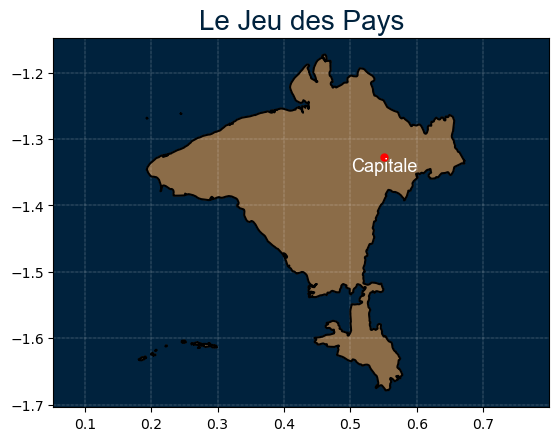



Il vous reste 10 tentatives



In [ ]:
play4()

Notes:

-Je n'ai pas réussi à coder moi même la jointure donc j'ai juste utilisé la fonction merge 
-J'ai essayé de coder une projection des coordonnées x et y selon la projection de mercator pour un affichage moins écrasé
notamment aux pôles , la fonction compilait mais ne donnait rien donc j'ai préféré la supprimer
-Une de mes dataframes s'appelle world2 mais ce n'est pas le world2 de la question 6 , j'ai échangé les notations 
-Il faut taper le nom des pays en anglais et avec les premières lettres de chaque partie du mot en majuscule
-J'utilise la dataframe avec les capitales très tôt dans le projet car je m'en sers pour afficher la capitale du pays dans 
plot_shape
-Mes versions de play2 et play3 sont plus avancées que celles demandées dans les questions du projet mais j'ai préféré laisser ça comme ceci
